**MÓDULO #7 - APRENDIZAJE NO SUPERVISADO**

### **TEMA 1: Número de agrupaciones utilizando la gráfica K-Elbow**

1.	Reutilizando parte del código del ejemplo, carga los datos de la Base de Datos Wine presente en la librería Scikit-Learn.
2.	Plotea los dos primeros atributos o columnas de los datos como puntos en el plano, coloreando la distribución por grupos esperada (“ground truth”).

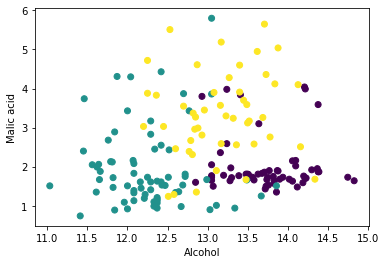

In [52]:
from sklearn import cluster, datasets, metrics
import numpy as np
import matplotlib.pyplot as plt

wine = datasets.load_wine()
X = np.array(wine.data)
y = np.array(wine.target)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')

plt.show()

3.	Agrupa los datos utilizando Kmeans y genera la gráfica K-Elbow. ¿Qué número de grupos es el más adecuado según la gráfica?
4.	Plotea otra vez los dos primeros atributos, pero ahora coloreando según los grupos obtenidos.

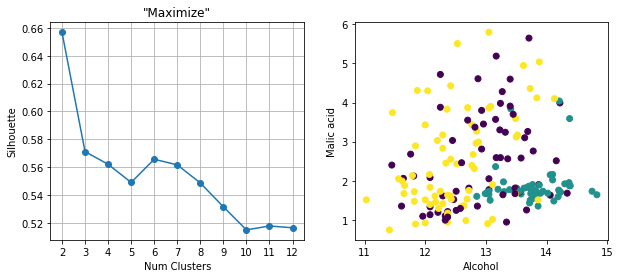

In [53]:
y_preds = []
results = {}
for k in range(2, int(np.sqrt(len(X)))):
  k_means = cluster.KMeans(n_clusters=k).fit(X)
  y_pred = k_means.predict(X)
  y_preds.append(y_pred)
  results[k] = metrics.silhouette_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))

ax0.plot(clusters_counts, index_values, 'o-')
ax0.grid(True)
ax0.set_title('"Maximize"')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts)
ax0.set_ylabel('Silhouette')

ax1.scatter(X[:, 0], X[:, 1], c=y_preds[1])
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')

plt.show()

### **TEMA 2 Índice Calinski-Harabasz**

1.	Cargue los datos de la Base de Datos Iris.
2.	Transfórmala utilizando el método sklearn.preprocessing.MinMaxScaler para que todos los valores estén entre 0 y 1.

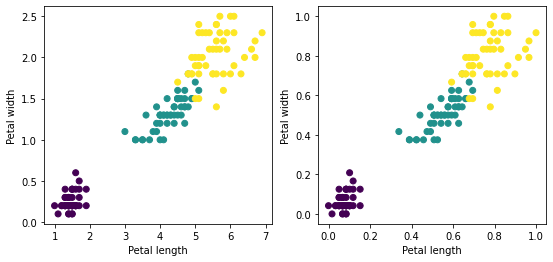

In [54]:
from sklearn.preprocessing import MinMaxScaler

iris = datasets.load_iris()
X = np.array(iris.data)
y = np.array(iris.target)

# Plot the training points
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))

ax0.scatter(X[:, 2], X[:, 3], c=y)
ax0.set_xlabel('Petal length')
ax0.set_ylabel('Petal width')

# normalize dataset for easier parameter selection
X2 = MinMaxScaler().fit_transform(X)
ax1.scatter(X2[:, 2], X2[:, 3], c=y)
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')

plt.show()

3.	Agrupa con Kmeans y valida utilizando el índice Calinski-Harabasz.
4.	Plotea la gráfica K-Elbow y colorea el resultado del mejor agrupamiento.

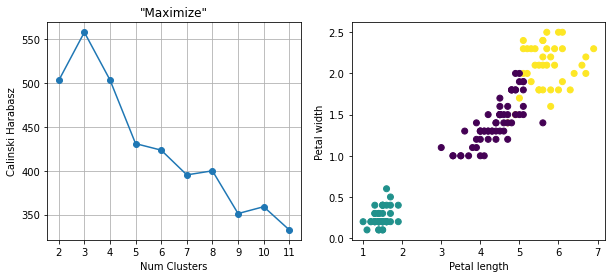

In [55]:
y_preds = []
results = {}
for k in range(2, int(np.sqrt(len(X2)))):
  k_means = cluster.KMeans(n_clusters=k).fit(X2)
  y_pred = k_means.predict(X2)
  y_preds.append(y_pred)
  results[k] = metrics.calinski_harabasz_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))

ax0.plot(clusters_counts, index_values, 'o-')
ax0.grid(True)
ax0.set_title('"Maximize"')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts)
ax0.set_ylabel('Calinski Harabasz')

ax1.scatter(X[:, 2], X[:, 3], c=y_preds[1])
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')

plt.show()

### **TEMA 3 Número de agrupaciones utilizando los valores de los coeficientes de Silhouette (gráfica SilhouettePlot)**

1.	Transforma la Base de Datos Iris para que solo te quedes con las dos últimas columnas.

In [56]:
X = X[:,2:]

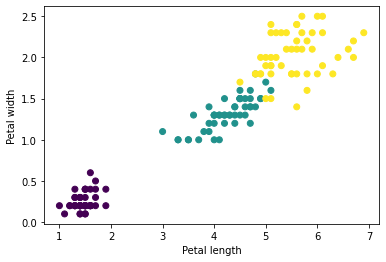

In [57]:
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.show()

2.	Agrupa la base de datos transformada para [2,3,4 y 5] grupos y calcula los coeficientes Silhouette.
3.	Genera las gráficas Silhouette y los plots de cada agrupamiento, similar al ejemplo analizado.
4.	Para cada agrupamiento calcula los centroides del Kmeans y añádelos a los plots de los agrupamientos.

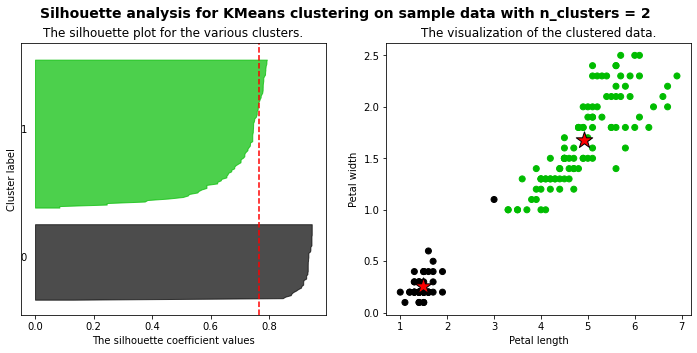

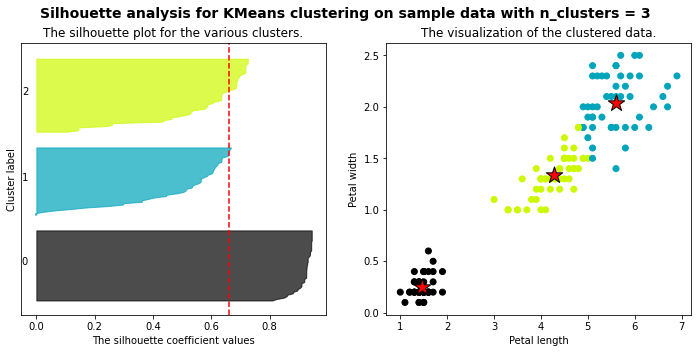

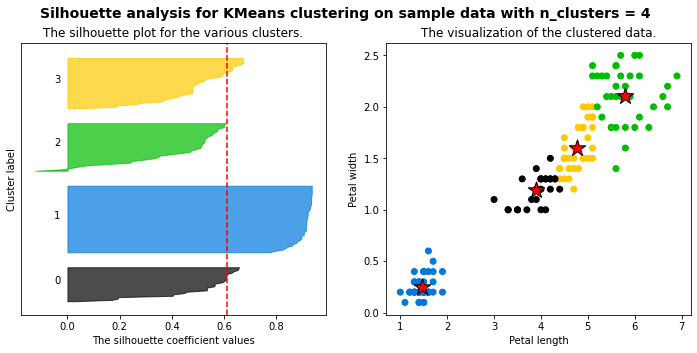

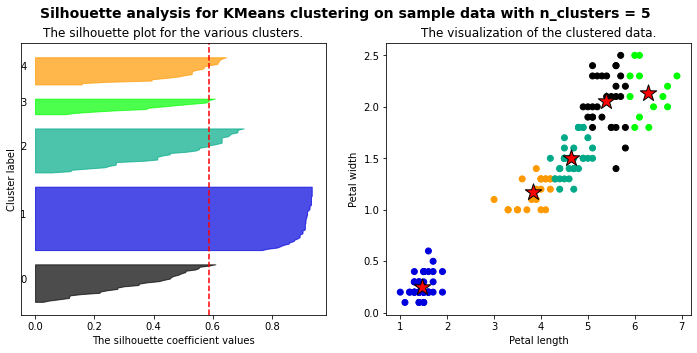

In [67]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

n_clusters = [2, 3, 4, 5]

for k in n_clusters:
  fig, (ax0, ax1) = plt.subplots(1, 2)
  fig.set_size_inches(12, 5)

  # The (k+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax0.set_ylim([0, len(X) + (k + 1) * 10])

  k_means = cluster.KMeans(n_clusters=k)
  y_pred = k_means.fit_predict(X)
  silhouette_avg = metrics.silhouette_score(X, y_pred)
  sample_silhouette_values = metrics.silhouette_samples(X, y_pred)

  y_lower = 10
  for i in range(k):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax0.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax0.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax0.set_title("The silhouette plot for the various clusters.")
  ax0.set_xlabel("The silhouette coefficient values")
  ax0.set_ylabel("Cluster label")
  ax0.set_yticks([])  # Clear the yaxis labels / ticks

  # The vertical line for average silhouette score of all the values
  ax0.axvline(x=silhouette_avg, color="red", linestyle="--")

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(y_pred.astype(float) / k)
  ax1.scatter(X[:, 0], X[:, 1], c=colors)

  # Labeling the clusters
  centers = k_means.cluster_centers_
  # Draw stars at cluster centers
  ax1.scatter(centers[:, 0], centers[:, 1], marker='*',
              c="red", alpha=1, s=300, edgecolor='k')

  ax1.set_title("The visualization of the clustered data.")
  ax1.set_xlabel('Petal length')
  ax1.set_ylabel('Petal width')

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % k),
                fontsize=14, fontweight='bold')

plt.show()

### **TEMA 4 Distancia relativa entre agrupaciones; importancia relativa de las agrupaciones**

1.	Diseña una estrategia para obtener, según los índices de validación vistos en toda la sesión, el mejor agrupamiento posible en la Base de Datos Iris.
2.	Para ello, agrupa los datos en distintos números de grupos utilizando los tres algoritmos de agrupamiento estudiados.
3.	Compara los resultados utilizando las gráficas K-Elbow.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklea

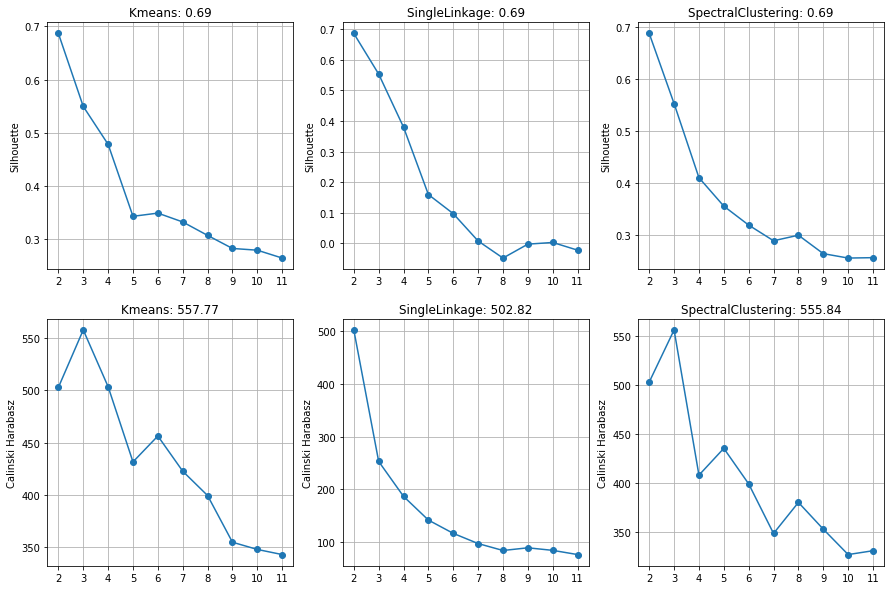

In [91]:
# Load Iris
iris = datasets.load_iris()
X = np.array(iris.data)
y = np.array(iris.target)

# Normalize dataset for easier parameter selection
X2 = MinMaxScaler().fit_transform(X)

algorithms = [('Kmeans', cluster.KMeans()),
              ('SingleLinkage', cluster.AgglomerativeClustering(linkage="single")),
              ('SpectralClustering', cluster.SpectralClustering(affinity="nearest_neighbors"))]

fig, axes = plt.subplots(nrows=2, ncols=len(algorithms), figsize=(15,10))

for i in range(len(algorithms)):
  y_preds = []
  results1 = {}
  results2 = {}
  for k in range(2, int(np.sqrt(len(X2)))):
    algorithms[i][1].n_clusters = k
    y_pred = algorithms[i][1].fit_predict(X2)
    y_preds.append(y_pred)
    results1[k] = metrics.silhouette_score(X, y_pred)
    results2[k] = metrics.calinski_harabasz_score(X, y_pred)

  clusters_counts1 = list(results1.keys())
  index_values1 = list(results1.values())
  clusters_counts2 = list(results2.keys())
  index_values2 = list(results2.values())

  axes[0][i].plot(clusters_counts1, index_values1, 'o-')
  axes[0][i].grid(True)
  axes[0][i].set_title(algorithms[i][0]+": {:.2f}".format(max(index_values1)))
  axes[0][i].set_xticks(clusters_counts1)
  axes[0][i].set_ylabel('Silhouette')

  axes[1][i].plot(clusters_counts2, index_values2, 'o-')
  axes[1][i].grid(True)
  axes[1][i].set_title(algorithms[i][0]+": {:.2f}".format(max(index_values2)))
  axes[1][i].set_xticks(clusters_counts2)
  axes[1][i].set_ylabel('Calinski Harabasz')

plt.show()

4.	Describe en un pequeño reporte cuál fue el mejor agrupamiento obtenido y cómo llegaste a esa conclusión.

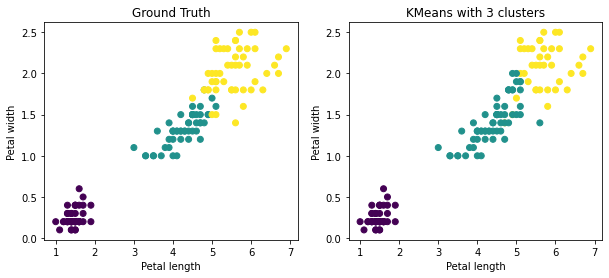

In [94]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))

ax0.scatter(X[:, 2], X[:, 3], c=y)
ax0.set_title('Ground Truth')
ax0.set_xlabel('Petal length')
ax0.set_ylabel('Petal width')

algorithms[0][1].n_clusters = 3
y_pred = algorithms[0][1].fit_predict(X2)

# normalize dataset for easier parameter selection
ax1.scatter(X[:, 2], X[:, 3], c=y_pred)
ax1.set_title('KMeans with 3 clusters')
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')

plt.show()